In [105]:
#Importing Required Libraries
import numpy as np
import pandas as pd


In [106]:
df = pd.read_csv('50_startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [108]:
df.describe() #From output seems like there are no outliers.
#However lets apply the IQR rule to determine outliers.

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [109]:
#Handling Outliers for all numeric columns
#Numeric columns - Salary
#To remove Outlier we can use 1.5 IQR Rule
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    sorted(datacolumn)
    
    #GET Q1 and Q3
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #Calc IQR
    IQR = Q3 - Q1
    
    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)
    
    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)
    
    return lr,ur


In [110]:
#Implementing outlierDetection function on Salary column - only numeric column.
df.columns.to_list()
#Consider only numeric columns 

num_list = ['R&D Spend', 'Administration' , 'Marketing Spend' ]
for col in num_list:
    lowerRange,upperRange = outlierDetection(df[col])
    outlier_upper = df[col] > upperRange 
    outlier_lower = df[col] < lowerRange
    if outlier_upper.any() or outlier_lower.any():
        print ("Outlier Detected for %r " % col)
#Hence as confirmed this dataset does not have any outliers

In [111]:
#HAndling Inappropriate data
df['R&D Spend'].unique() #We are assuming based on domain that '0' can be a valid data
df['Administration'].unique() #We are assuming all valus are  valid data
df['Marketing Spend'].unique() #We are assuming based on domain that '0' can be a valid data
df['Profit'].unique() #We are assuming all valus are  valid data


array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [112]:
#Wecan see from info that there are no missing values
df.isna().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [113]:
#Check and Handle categorical data
#State is the only categorical data that needs to be handled. Rest are numerica data
df.State.unique()
dfU = pd.concat([pd.get_dummies(df.State), df.iloc[:,[0,1,2,4]]] , axis = 1)
#pd.get_dummies(df.Pincode)
dfU

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94
5,0,0,1,131876.90,99814.71,362861.36,156991.12
6,1,0,0,134615.46,147198.87,127716.82,156122.51
7,0,1,0,130298.13,145530.06,323876.68,155752.60
8,0,0,1,120542.52,148718.95,311613.29,152211.77
9,1,0,0,123334.88,108679.17,304981.62,149759.96


In [114]:
#There are no ordinal data nor string data


In [115]:
#Lets do feature scaling
# Seperate the data as features and label

features = dfU.iloc[:,:-1].values 
label = dfU.Profit.values
features
label

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [116]:
#Perform feature scaling
import seaborn as sns
%matplotlib inline


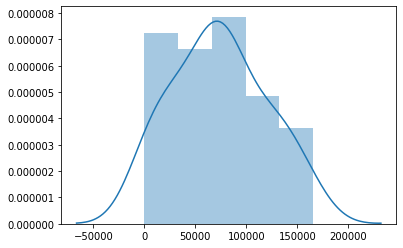

In [117]:

sns.distplot(features[:,3]) #R& D spend    distribution


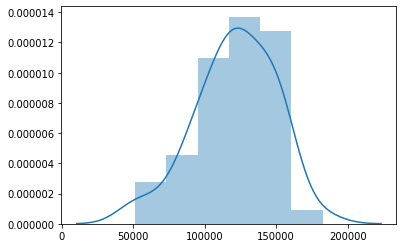

In [118]:
sns.distplot(features[:,4]) #Administration distribution

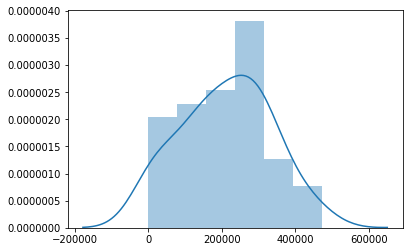

In [119]:
sns.distplot(features[:,5]) #Marketing distribution

In [120]:
#Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
features

array([[-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [-7.17740563e-01, -6.85994341e-01,  1.39326109e+00,
         1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.39326109e+00, -6.85994341e-01, -7.17740563e-01,
         1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [-7.17740563e-01,  1.45773797e+00, -7.17740563e-01,
         1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [-7.17740563e-01, -6.85994341e-01,  1.393

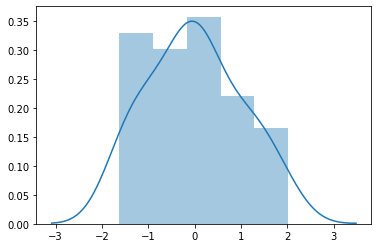

In [121]:

sns.distplot(features[:,3]) #R& D spend    distribution

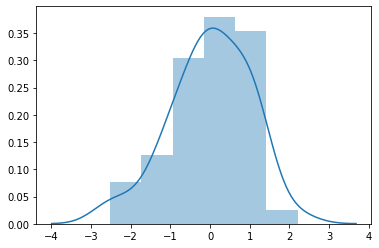

In [122]:
sns.distplot(features[:,4]) #Administration distribution

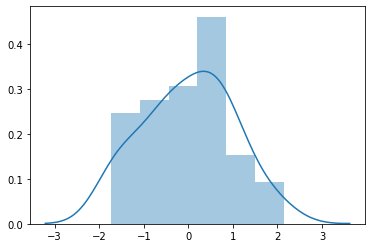

In [123]:
sns.distplot(features[:,5]) #Marketing distribution

In [124]:
#Standardization using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler(feature_range=(0,1))
features = mmc.fit_transform(features)
features

array([[0.        , 0.        , 1.        , 1.        , 0.65174393,
        1.        ],
       [1.        , 0.        , 0.        , 0.98335946, 0.76197173,
        0.94089337],
       [0.        , 1.        , 0.        , 0.92798459, 0.37957895,
        0.8646636 ],
       [0.        , 0.        , 1.        , 0.87313643, 0.51299839,
        0.81223513],
       [0.        , 1.        , 0.        , 0.85943772, 0.30532804,
        0.77613557],
       [0.        , 0.        , 1.        , 0.797566  , 0.3694479 ,
        0.76912588],
       [1.        , 0.        , 0.        , 0.81412828, 0.73016111,
        0.27071031],
       [0.        , 1.        , 0.        , 0.7880179 , 0.71745725,
        0.68649342],
       [0.        , 0.        , 1.        , 0.72901786, 0.74173276,
        0.66049977],
       [1.        , 0.        , 0.        , 0.74590551, 0.43692884,
        0.64644319],
       [0.        , 1.        , 0.        , 0.61635061, 0.45150637,
        0.48573267],
       [1.        , 0

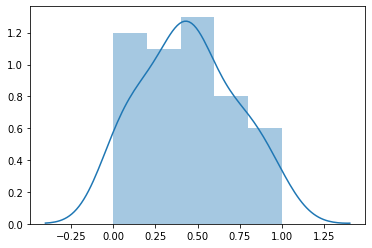

In [125]:

sns.distplot(features[:,3]) #R& D spend    distribution

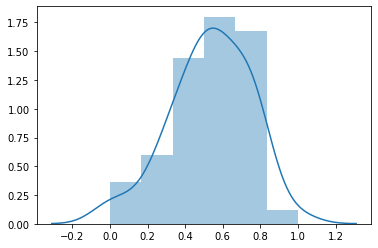

In [126]:
sns.distplot(features[:,4]) #Administration distribution

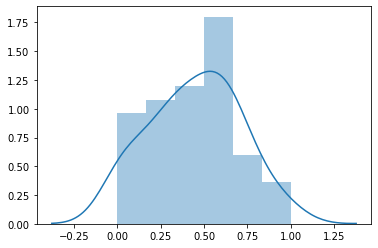

In [127]:
sns.distplot(features[:,5]) #Marketing distribution

In [128]:
#Multivariate Regression
#Consider only numerical columns
# 1. Seperate your data as features and label
features = dfU.iloc[:,[3,4,5]].values
label = dfU.iloc[:,[6]].values


In [129]:
# 5. Create Train Test Splits

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state = 45)


In [130]:
# 6. Create Statistical Model
#
# We will be using Sci-kit learn to create the model
# Scikit Learn expects the following:
# 1. Data must be complete
# 2. Data must be strictly Numeric


from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()

lrModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
#Lets Explore the equation

print("Co-efficients: ")
print(lrModel.coef_)

print("Intercept: ")
print(lrModel.intercept_)

Co-efficients: 
[[ 0.7957237  -0.02461232  0.03042291]]
Intercept: 
[49924.64611218]


In [132]:
#Equation of Line is 

#Profit = 49924.64611218 + (0.7957237)(R&D) + (-0.02461232)(Adm) + (0.03042291)(Markg)

In [133]:
# 6. Check the quality of the model

# We use accuracy check as a mechanism to check the quality of the model

lrModel.score(X_train,y_train)


0.933550104956792

In [134]:
# To ensure our model quality is GOOD, ensure your model performs well with Unknown data
lrModel.score(X_test,y_test)

0.9836713364627709

In [135]:


#If Test Data Score > Train Data Score ---- Good Quality Model (Generalized Model)
#If Test Data Score < Train Data Score ---- Either Overfitted Model -or- Underfitted Model 
#                                           depending on score value

In [136]:
# We always approve and deploy GENERALIZED Model.
#Hence we accept this model!!!!!!
